## Exploratory Data Analysis on Employee Dataset 

### An employee dataset is provided which contains the details of employees like name, team, number, position, age, height, weight, college and salary. Each employee is associated with a team and position. The height column has wrong values. Values from 150 to 180 inches have to be entered. Insights have to be obtained from the data after analysis.

### 1. Import the necessary modules

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### 2. Reading the dataset

In [30]:
df=pd.read_csv("Employees.csv")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


### 3. Obtaining basic information from dataset

In [31]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [32]:
df.index

RangeIndex(start=0, stop=458, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


##### Salary and College has null values

In [33]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [34]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


### 4. Data cleaning and analysis

In [10]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [11]:
df.duplicated().sum()

0

##### Wrong values in height column

In [12]:
df["Height"].head()

0    06-Feb
1    06-Jun
2    06-May
3    06-May
4    06-Oct
Name: Height, dtype: object

In [14]:
df["Height"].tail()

453    06-Mar
454    06-Jan
455    07-Mar
456       7-0
457    07-Mar
Name: Height, dtype: object

In [6]:
new_heights=np.random.randint(150,180,458)
new_heights

array([152, 167, 175, 175, 164, 162, 179, 156, 164, 152, 177, 153, 172,
       164, 159, 166, 156, 156, 170, 178, 160, 152, 160, 168, 157, 166,
       172, 156, 170, 151, 164, 158, 171, 164, 171, 164, 157, 160, 179,
       158, 178, 164, 174, 170, 150, 157, 172, 175, 150, 163, 164, 177,
       160, 159, 178, 156, 157, 152, 179, 157, 173, 150, 174, 165, 158,
       159, 171, 171, 152, 159, 154, 168, 153, 172, 174, 167, 161, 169,
       160, 167, 177, 164, 176, 160, 176, 169, 175, 166, 164, 156, 164,
       155, 174, 169, 176, 158, 166, 169, 172, 179, 170, 162, 162, 177,
       158, 157, 156, 177, 161, 175, 171, 160, 173, 170, 170, 159, 158,
       162, 173, 150, 158, 157, 156, 177, 171, 179, 160, 178, 160, 155,
       171, 161, 160, 151, 176, 174, 150, 156, 152, 165, 167, 167, 158,
       156, 176, 179, 154, 150, 152, 175, 168, 162, 163, 170, 157, 171,
       162, 167, 170, 161, 177, 178, 176, 168, 157, 166, 166, 154, 162,
       178, 175, 166, 177, 155, 155, 158, 157, 161, 155, 161, 16

In [7]:
len(new_heights)

458

In [8]:
df["Height"]=new_heights

In [9]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,152,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,167,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,175,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,175,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,164,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,155,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,173,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,167,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,157,231,Kansas,947276.0


In [13]:
df["Height"].head(10)

0    152
1    167
2    175
3    175
4    164
5    162
6    179
7    156
8    164
9    152
Name: Height, dtype: int32

In [14]:
df["Height"].tail(10)

448    173
449    178
450    177
451    175
452    153
453    155
454    173
455    167
456    157
457    175
Name: Height, dtype: int32

In [15]:
df.describe(include="all")

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458.000000,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,NaN,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,NaN,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,NaN,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,165.104803,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,8.266217,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,150.000000,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,158.000000,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,165.000000,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,172.000000,240.000000,NaN,6.500000e+06


In [45]:
df.Team.unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [47]:
df.Team.nunique()

30

#### How many are there in each Team and the percentage splitting with respect to the total employees

In [37]:
teams=df["Team"].value_counts()
teams

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

#### Percentage splitting with respect to the total employees

In [19]:
print("Percentage splitting with respect to total employees")
percentage_split=(teams/458)*100
print(percentage_split)


Percentage splitting with respect to total employees
Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.2751

Text(0, 0.5, 'Percentage')

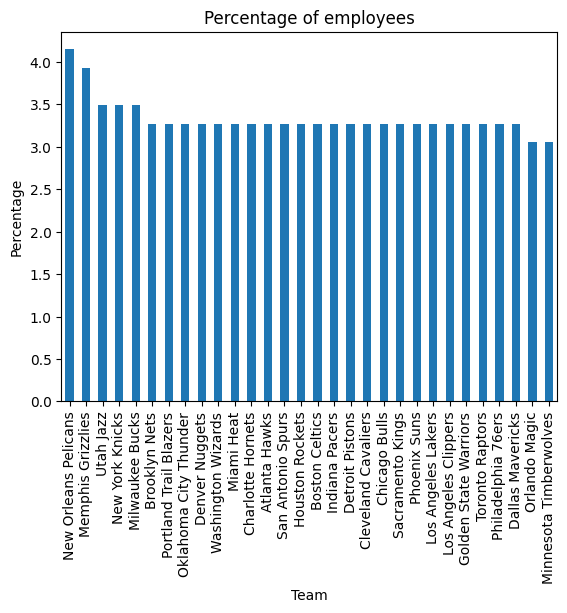

In [20]:
percentage_split.plot(kind="bar")
plt.title("Percentage of employees")
plt.ylabel("Percentage")

### 2.Segregate the employees w.r.t different positions.

In [21]:
df["Position"]

0      PG
1      SF
2      SG
3      SG
4      PF
       ..
453    PG
454    PG
455     C
456     C
457     C
Name: Position, Length: 458, dtype: object

In [22]:
df["Position"].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

### 3.Find from which age group most of the employees belong to.

In [23]:
df["Age"]

0      25
1      25
2      27
3      22
4      29
       ..
453    26
454    24
455    26
456    26
457    25
Name: Age, Length: 458, dtype: int64

In [24]:
age=df["Age"].value_counts().idxmax()
print("Most of the employees belong to age", age)

Most of the employees belong to age 24


### 4.Find out under which team and position, spending in terms of salary is high.

In [25]:
x=df.groupby(["Team","Position"])["Salary"].sum().idxmax()
x

('Los Angeles Lakers', 'SF')

### 5.Find if there is any correlation between age and salary , represent it visually.

In [26]:
cor=df[["Age","Salary"]].corr()
cor

,Age,Salary
Age,1.000000,0.214009
Salary,0.214009,1.000000


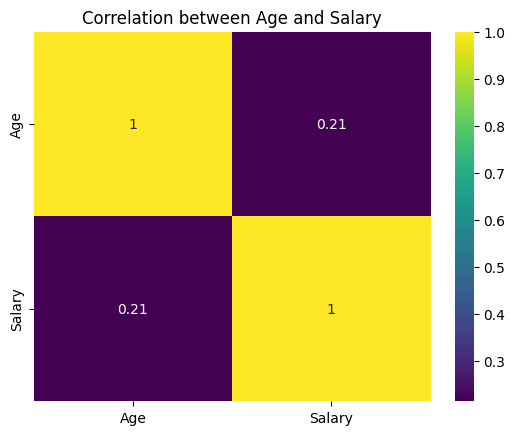

In [27]:
sns.heatmap(cor,annot=True,cmap="viridis")
plt.title("Correlation between Age and Salary")
plt.show()

### 6. Conclusion

##### By the exploratory data analysis of the employee dataset, the number of employees in each team is found, along with the splitting of employees. The total no. of employees w.r.t position SG, PF, PG, SF and C is found out, where the highest no. of employees belong to the team SG with a number of 102. Most of the employees belong to the age 24. Salary spending is high in the team Los Angeles Lakers with position SF. The dark colour in the heatmap indicates there is a positive correlation between age and salary.